In [4]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 9.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.1 MB 10.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 9.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 9.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/41.0 MB 8.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/41.0 MB 9.8 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/41.0 MB 9.8 MB/s eta 0:00:04
   ------- -------------------------------- 7.6/41.0 MB 9.6 MB/s eta 0:00:04
   --------- ------------------------------ 9.4/41.0 MB 9.4 MB/s eta 0:00:04
   --------

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


- Importing Libraries

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the cleaned CSV dataset
file_path = r"E:\Aditya\Downloads\clean_train_features_dr_unified_og.csv"
df = pd.read_csv(file_path)

- Separating the feature and target variable to prepare inputs and labels for model training and verify the class distribution.

In [7]:
# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

print(f"Loaded dataset with shape: {X.shape}")
print(f"Class distribution:\n{y.value_counts().sort_index()}")

Loaded dataset with shape: (73995, 2048)
Class distribution:
label
0    55162
1     3706
2    12119
3     1006
4     2002
Name: count, dtype: int64


- Standardize features to zero mean and unit variance so that each contributes equally and improves model convergence.

In [8]:
# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 59196, Testing samples: 14799


In [10]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [11]:
# Predict
y_pred = clf.predict(X_test)

In [12]:
# Evaluate
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11032
           1       0.68      0.03      0.06       741
           2       0.63      0.11      0.19      2424
           3       0.43      0.01      0.03       201
           4       0.69      0.05      0.09       401

    accuracy                           0.77     14799
   macro avg       0.64      0.24      0.25     14799
weighted avg       0.74      0.77      0.69     14799

Confusion Matrix:
[[11025     3     3     0     1]
 [  668    23    45     3     2]
 [ 2145     4   271     0     4]
 [  151     1    44     3     2]
 [  310     3    67     1    20]]


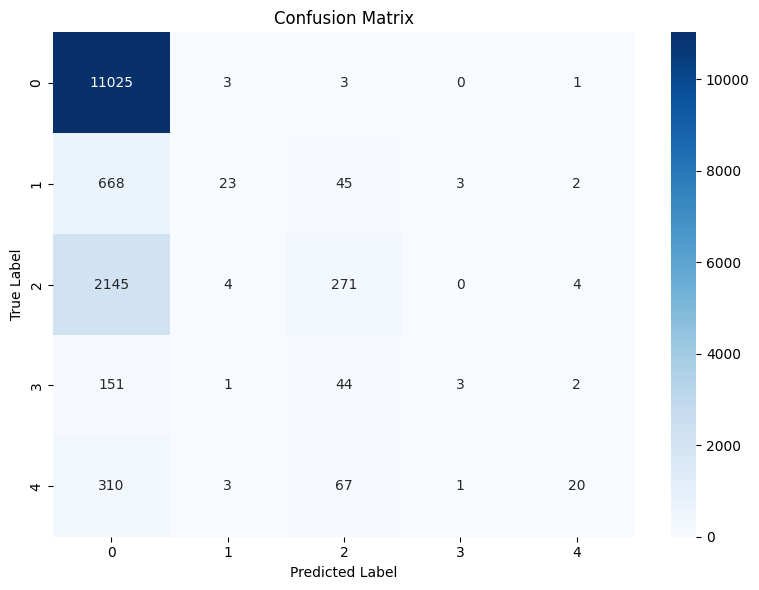

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Define class labels
class_labels = ['0', '1', '2', '3', '4']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()